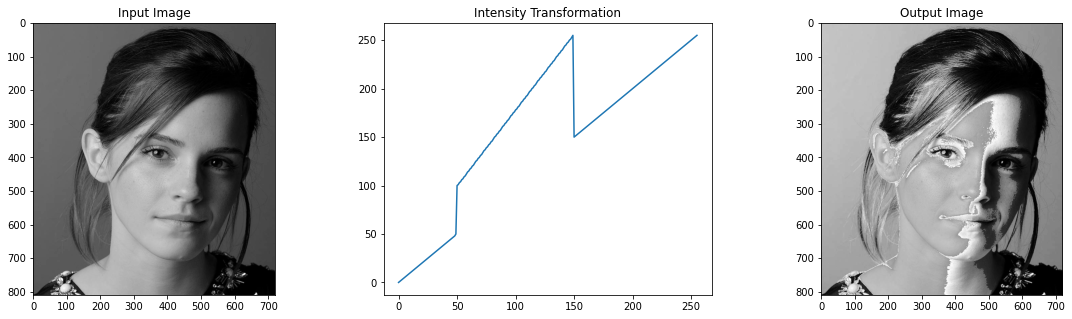

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

transform = np.concatenate((np.linspace(0, 50, 50), np.linspace(100, 255, 100), np.linspace(150, 255, 106)), axis=0).astype(np.uint8)

im = cv.imread(r"emma_gray.jpg", cv.IMREAD_GRAYSCALE)
assert im is not None
im_transformed = cv.LUT(im, transform)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(im, cmap = "gray", vmin=0, vmax=255)
ax[0].set_title("Input Image")
ax[1].plot(transform)
ax[1].set_title("Intensity Transformation")
ax[2].imshow(im_transformed, cmap = "gray", vmin=0, vmax=255)
ax[2].set_title("Output Image")

plt.show()

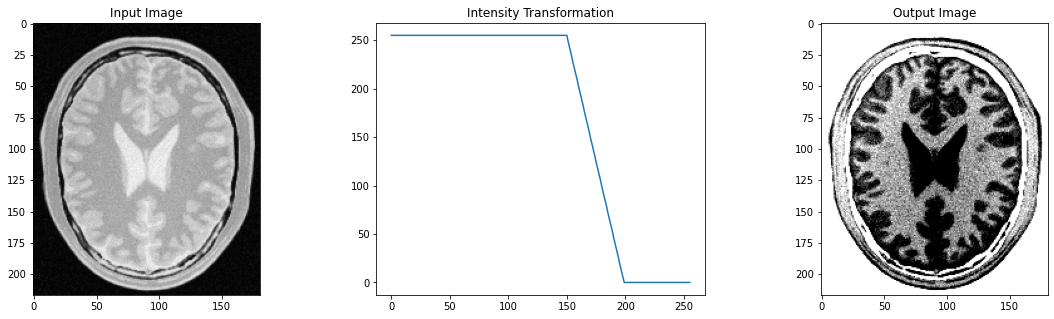

In [8]:
transform_white = np.concatenate((np.linspace(255, 255, 150), np.linspace(255, 0, 50), np.linspace(0, 0, 56)), axis=0).astype(np.uint8)
im2 = cv.imread("brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
assert im2 is not None
im2_transformed = cv.LUT(im2, transform_white)
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(im2, cmap = "gray", vmin=0, vmax=255)
ax[0].set_title("Input Image")
ax[1].plot(transform_white)
ax[1].set_title("Intensity Transformation")
ax[2].imshow(im2_transformed, cmap = "gray", vmin=0, vmax=255)
ax[2].set_title("Output Image")

plt.show()

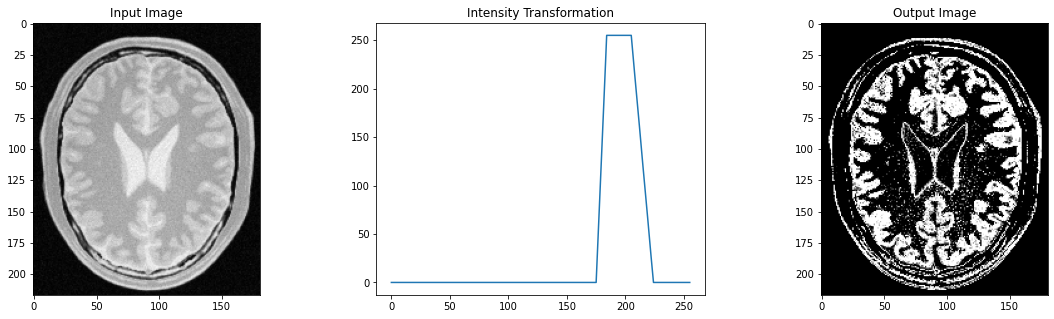

In [10]:
transform_gray = np.concatenate((np.linspace(0, 0, 175), np.linspace(0, 255, 10), np.linspace(255, 255, 20), np.linspace(255, 0, 20), np.linspace(0, 0, 31)), axis=0).astype(np.uint8)

im2_transforme_gray = cv.LUT(im2, transform_gray)
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(im2, cmap = "gray", vmin=0, vmax=255)
ax[0].set_title("Input Image")
ax[1].plot(transform_gray)
ax[1].set_title("Intensity Transformation")
ax[2].imshow(im2_transforme_gray, cmap="gray", vmin=0, vmax=255)
ax[2].set_title("Output Image")

plt.show()

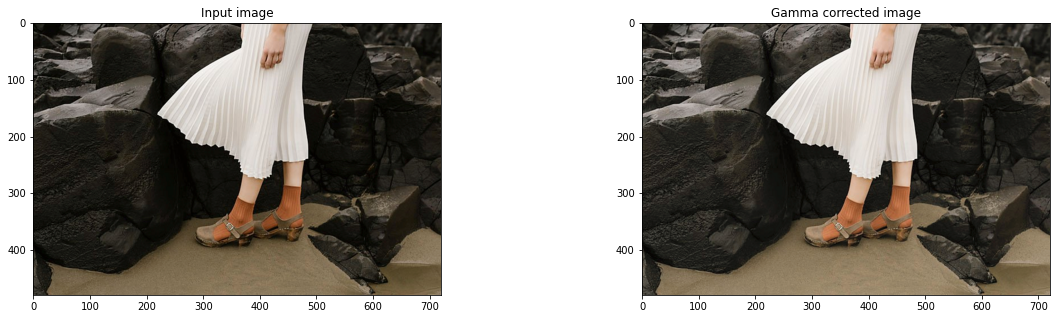

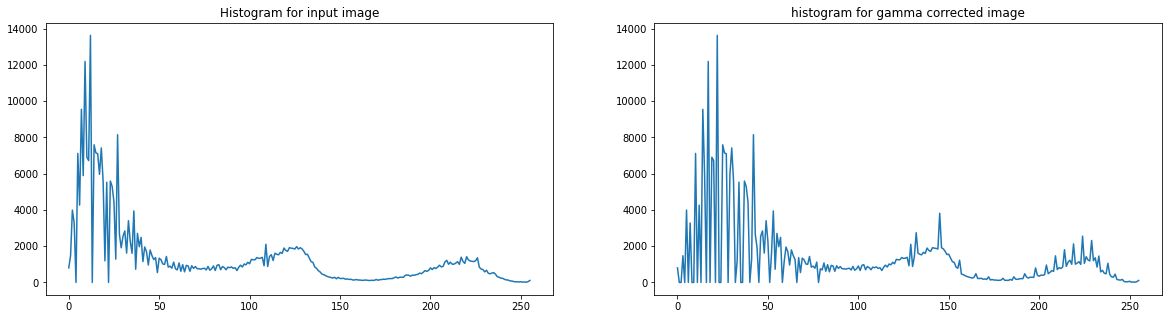

In [11]:
gamma = 0.8

im3 = cv.imread(r"highlights_and_shadows.jpg")
assert im3 is not None
im3 = cv.cvtColor(im3, cv.COLOR_BGR2Lab)

im3_rbg = cv.cvtColor(im3, cv.COLOR_Lab2RGB)
original_hist = cv.calcHist([im3], [0], None, [256], [0, 256])
transform = np.array([((i/255)**gamma)*255 for i in range(256)]).astype(np.uint8)
im3[:,:,0] = cv.LUT(im3[:,:,0], transform)
transformed_hist = cv.calcHist([im3], [0], None, [256], [0, 256])
im3 = cv.cvtColor(im3, cv.COLOR_Lab2RGB)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].imshow(im3_rbg)
ax[0].set_title("Input image")
ax[1].imshow(im3)
ax[1].set_title("Gamma corrected image")

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(original_hist)
ax[0].set_title("Histogram for input image")
ax[1].plot(transformed_hist)
ax[1].set_title("histogram for gamma corrected image")

plt.show()

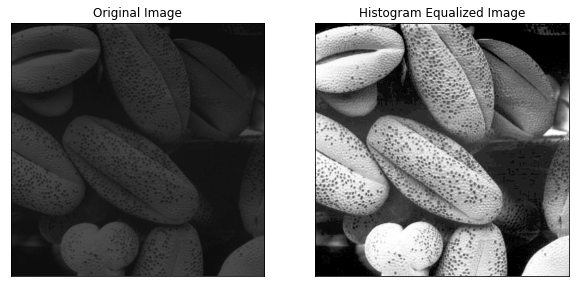

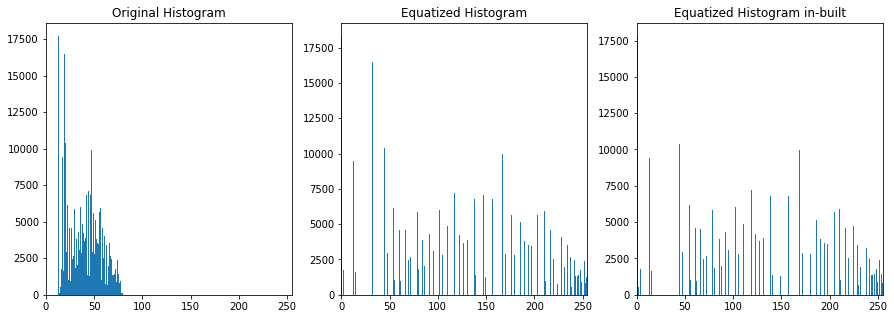

In [12]:
def equalizeHist(img):
    hist = np.histogram(img.flatten(),256,[0,256])[0]
    cdf = hist.cumsum()
    cdf = np.ma.masked_equal(cdf,0)
    cdf = (cdf - cdf.min())*255/(cdf.max()-cdf.min())
    cdf = np.ma.filled(cdf,0).astype('uint8')
    img_equatized = cv.LUT(img, cdf)
    return img_equatized

im4 = cv.imread("shells.png", cv.IMREAD_GRAYSCALE)
assert im4 is not None

fig4_equatized = equalizeHist(im4)
fig4_equatized_inbuilt = cv.equalizeHist(im4)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(im4, cmap = "gray", vmin=0, vmax=255)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Original Image")
ax[1].imshow(fig4_equatized, cmap = "gray", vmin=0, vmax=255)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("Histogram Equalized Image")


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(im4.flatten(),256,[0,256])
ax[0].set_xlim([0, 255])
ax[0].set_title("Original Histogram")
ax[1].hist(fig4_equatized.flatten(),256,[0,256])
ax[1].set_xlim([0, 255])
ax[1].set_title("Equatized Histogram")
ax[2].hist(fig4_equatized_inbuilt.flatten(),256,[0,256])
ax[2].set_xlim([0, 255])
ax[2].set_title("Equatized Histogram in-built")


plt.show()

In [21]:
def zoom(img, factor, mode="nn"):
    rows, cols = int(factor*img.shape[0]),  int(factor*img.shape[1])
    zoomed = np.zeros((rows, cols, img.shape[2]), img.dtype)
    old_x, old_y = img.shape[0], img.shape[1]
    if mode=="nn":
        for i in range(rows):
            for j in range(cols):
                x, y = i/factor, j/factor
                x = int(min( old_x - 1, round(x)))
                y = int(min(old_y - 1, round(y)))
                zoomed[i, j] = img[x, y]

    elif mode=="bl":
        for i in range(rows):
            for j in range(cols):
                x, y = i/factor, j/factor
                x_floor = int(np.floor(x))
                x_ceil = int(min( old_x - 1, np.ceil(x)))
                y_floor = int(np.floor(y))
                y_ceil = int(min(old_y - 1, np.ceil(y)))

                if (x_ceil == x_floor) and (y_ceil == y_floor):
                    q = img[int(x), int(y), :]

                elif (x_ceil == x_floor):
                    q1 = img[int(x), int(y_floor), :]
                    q2 = img[int(x), int(y_ceil), :]
                    q = q1 * (y_ceil - y) + q2 * (y - y_floor)

                elif (y_ceil == y_floor):
                    q1 = img[int(x_floor), int(y), :]
                    q2 = img[int(x_ceil), int(y), :]
                    q = (q1 * (x_ceil - x)) + (q2	 * (x - x_floor))

                else:
                    v1 = img[x_floor, y_floor, :]
                    v2 = img[x_ceil, y_floor, :]
                    v3 = img[x_floor, y_ceil, :]
                    v4 = img[x_ceil, y_ceil, :]

                    q1 = v1 * (x_ceil - x) + v2 * (x - x_floor)
                    q2 = v3 * (x_ceil - x) + v4 * (x - x_floor)
                    q = q1 * (y_ceil - y) + q2 * (y - y_floor)

                zoomed[i, j, :] = q

    return zoomed

def cal_normalized_sum(img1, img2):
    a, b, c = im_2.shape
    return np.sum((img1-img2)**2)/(a*b*c)

im = cv.imread(r"a1q5images\im02.png")
im_2 = cv.imread(r"a1q5images\im02small.png")

im_zoomed1 = zoom(im_2, 4, "nn")
im_zoomed2 = zoom(im_2, 4, "bl")


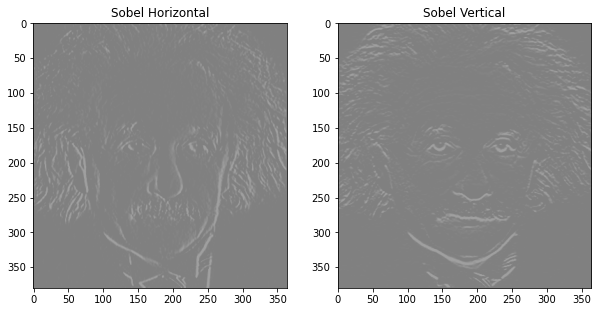

In [22]:
im6 = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE)
assert im6 is not None

sobel_h = np.array(((1, 0, -1), (2, 0, -2), (1, 0, -1)))
sobel_v = np.array(((-1, -2, -1), (0, 0, 0), (1, 2, 1)))
horizontal = cv.filter2D(im6, -1, sobel_h)
verical = cv.filter2D(im6, -1, sobel_v)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(horizontal, cmap = "gray", vmin=-1020, vmax=1020)
ax[0].set_title("Sobel Horizontal")
ax[1].imshow(verical, cmap = "gray", vmin=-1020, vmax=1020)
ax[1].set_title("Sobel Vertical")

plt.show()

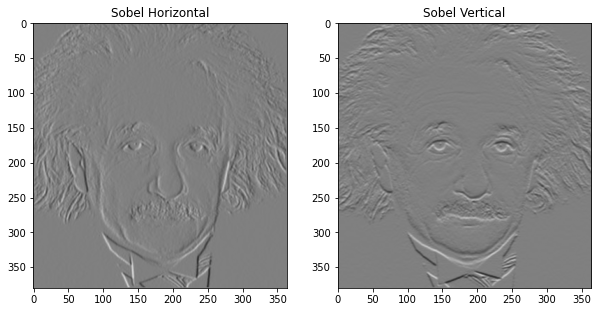

In [25]:
def sobel(img, mode):
    if mode == "vertical": kernel = np.array(((-1, -2, -1), (0, 0, 0), (1, 2, 1)), dtype=np.float32)
    elif mode == "horizontal": kernel = np.array(((-1, 0, 1), (-2, 0, 2), (-1, 0, 1)), dtype=np.float32)

    h, w = img.shape
    final = np.zeros((h, w), "float")

    for i in range(1, h-1):
        for j in range(1, w-1):
            final[i, j] = np.dot(img[i-1 :i+2 , j-1: j+2].flatten(), kernel.flatten())
        
    return final

v = sobel(im6, "vertical")
h = sobel(im6, "horizontal")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(h, cmap = "gray", vmin=-1020, vmax=1020)
ax[0].set_title("Sobel Horizontal")
ax[1].imshow(v, cmap = "gray", vmin=-1020, vmax=1020)
ax[1].set_title("Sobel Vertical")

plt.show()

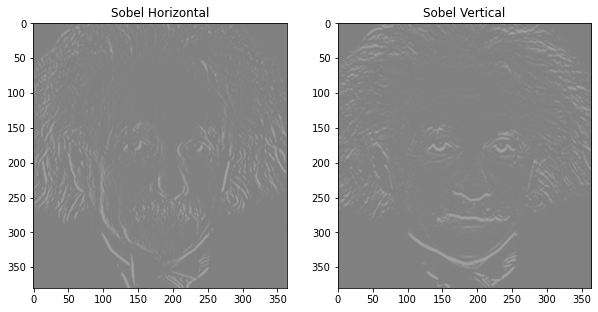

In [27]:
kernel_1 = np.array(((-1,), (0,), (1,)))
kernel_2 = np.array((1, 2, 1))

_1 = cv.filter2D(im6, -1, kernel_1)
_1 = cv.filter2D(_1, -1, kernel_2)
_2 = cv.filter2D(im6, -1, kernel_1.T)
_2 = cv.filter2D(_2, -1, kernel_2.T)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(_2, cmap = "gray", vmin=-1020, vmax=1020)
ax[0].set_title("Sobel Horizontal")
ax[1].imshow(_1, cmap = "gray", vmin=-1020, vmax=1020)
ax[1].set_title("Sobel Vertical")

plt.show()

In [38]:
im7 = cv.imread("daisy.jpg")
assert im7 is not None

mask = np.zeros(im7.shape[:2], np.uint8)
rect, fgModel, bgModel = (50,100,550,560), np.zeros((1, 65), np.float64), np.zeros((1, 65), np.float64)

mask, bgModel, fgModel = cv.grabCut(im7, mask, rect, bgModel, fgModel, 5, mode=cv.GC_INIT_WITH_RECT)

outputMask = np.where((mask == 2) | (mask == 0), 0, 1).astype(np.uint8)
output = im7*outputMask[:,:,np.newaxis]